<a href="https://colab.research.google.com/github/tomonari-masada/courses/blob/master/SML2020/obsolete/07_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life satisfactionの予測

### GDP per capitaだけでなく、他の属性も使って予測してみる。

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 

In [0]:
df = pd.read_csv('lifesat_extended.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    29 non-null     object 
 1   Air pollution                              29 non-null     float64
 2   Assault rate                               29 non-null     float64
 3   Consultation on rule-making                29 non-null     float64
 4   Dwellings without basic facilities         29 non-null     float64
 5   Educational attainment                     29 non-null     float64
 6   Employees working very long hours          29 non-null     float64
 7   Employment rate                            29 non-null     float64
 8   Homicide rate                              29 non-null     float64
 9   Household net adjusted disposable income   29 non-null     float64
 10  Household net financial weal

In [4]:
df.head()

,Country,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
0,Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,11.0,4.0,70.2,6.0,1.70,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914
1,Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,21.0,8.1,74.6,5.6,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372
2,Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,20.0,5.7,75.2,4.9,5.10,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,12239.894
3,Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,21.0,7.3,76.9,5.8,3.77,22655.0,91.0,1.1,58.0,521.0,14.20,55.0,79.0,18.4,12495.334
4,Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,26.0,5.5,76.2,6.1,9.46,20307.0,90.0,1.1,66.0,472.0,14.99,59.0,81.0,16.3,15991.736


In [5]:
df.columns

Index(['Country', 'Air pollution', 'Assault rate',
       'Consultation on rule-making', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'GDP per capita'],
      dtype='object')

国名だけを取り除く。

In [6]:
df.columns != 'Country'

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [7]:
df.columns[df.columns != 'Country']

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'GDP per capita'],
      dtype='object')

In [0]:
df_data = df[df.columns[df.columns != 'Country']]

In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Air pollution                              29 non-null     float64
 1   Assault rate                               29 non-null     float64
 2   Consultation on rule-making                29 non-null     float64
 3   Dwellings without basic facilities         29 non-null     float64
 4   Educational attainment                     29 non-null     float64
 5   Employees working very long hours          29 non-null     float64
 6   Employment rate                            29 non-null     float64
 7   Homicide rate                              29 non-null     float64
 8   Household net adjusted disposable income   29 non-null     float64
 9   Household net financial wealth             29 non-null     float64
 10  Housing expenditure         

In [10]:
df_data.describe()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,19.241379,3.572414,7.248276,2.400000,77.103448,8.791724,65.896552,1.596552,24302.137931,42052.000000,20.827586,6.062069,79.975862,6.493103,4.032069,36606.551724,90.068966,1.682759,67.655172,500.931034,14.890345,70.965517,82.896552,17.727586,33391.749138
std,7.224241,1.545476,2.718406,3.801034,15.062595,8.278210,7.788934,2.443867,6133.657664,31325.680935,2.879347,2.937980,2.960774,0.839613,4.166358,11696.416895,4.795318,0.445669,15.625702,21.142258,0.551333,11.216960,10.624583,1.176829,14650.076056
min,9.000000,1.300000,2.500000,0.000000,34.000000,0.160000,49.000000,0.300000,14095.000000,3251.000000,11.000000,2.400000,70.200000,4.800000,0.010000,16919.000000,72.000000,0.900000,30.000000,462.000000,13.420000,52.000000,56.000000,15.800000,9054.914000
25%,13.000000,2.200000,5.100000,0.200000,73.000000,3.660000,60.000000,0.600000,19326.000000,18465.000000,20.000000,4.800000,80.100000,5.800000,1.370000,25503.000000,89.000000,1.400000,65.000000,487.000000,14.610000,64.000000,78.000000,16.800000,19121.592000
50%,18.000000,3.600000,7.100000,0.700000,82.000000,6.160000,67.000000,0.900000,23965.000000,43045.000000,21.000000,5.500000,81.000000,6.800000,2.370000,36354.000000,90.000000,1.700000,69.000000,500.000000,14.910000,69.000000,85.000000,17.600000,37044.891000
75%,24.000000,4.900000,10.300000,3.200000,88.000000,12.250000,72.000000,1.300000,28307.000000,54987.000000,22.000000,6.500000,81.800000,7.300000,5.100000,46911.000000,94.000000,1.900000,77.000000,516.000000,15.110000,77.000000,91.000000,18.600000,43724.031000
max,35.000000,6.600000,11.500000,15.100000,94.000000,40.860000,82.000000,12.800000,41355.000000,145769.000000,26.000000,17.800000,83.200000,7.500000,18.390000,56340.000000,96.000000,2.500000,90.000000,542.000000,16.060000,93.000000,97.000000,19.800000,55805.204000


Life satisfactionは、ターゲット（目的変数）として取り出す。

In [0]:
df_lifesat = df_data['Life satisfaction']

In [12]:
df_lifesat.describe()

count    29.000000
mean      6.493103
std       0.839613
min       4.800000
25%       5.800000
50%       6.800000
75%       7.300000
max       7.500000
Name: Life satisfaction, dtype: float64

In [0]:
df_covariate = df_data[df_data.columns[df_data.columns != 'Life satisfaction']]

Life satisfactionは目的変数なので、説明変数からは除去。

In [14]:
df_covariate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Air pollution                              29 non-null     float64
 1   Assault rate                               29 non-null     float64
 2   Consultation on rule-making                29 non-null     float64
 3   Dwellings without basic facilities         29 non-null     float64
 4   Educational attainment                     29 non-null     float64
 5   Employees working very long hours          29 non-null     float64
 6   Employment rate                            29 non-null     float64
 7   Homicide rate                              29 non-null     float64
 8   Household net adjusted disposable income   29 non-null     float64
 9   Household net financial wealth             29 non-null     float64
 10  Housing expenditure         

説明変数のデータをnumpyの配列に変換。

In [0]:
X = df_covariate.to_numpy()

In [16]:
X.shape

(29, 24)

目的変数のほうもnumpyの配列に変換。

In [0]:
y = df_lifesat.to_numpy()

In [18]:
y.shape

(29,)

訓練データ、検証データ、テストデータに分割。

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [21]:
X_test.shape

(6, 24)

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [23]:
X_valid.shape

(5, 24)

In [24]:
X_train.shape

(18, 24)

訓練データで線形モデルを学習させる。

In [25]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

検証データ上で評価。評価尺度は、MSE。

In [0]:
from sklearn.metrics import mean_squared_error

In [27]:
mean_squared_error(y_valid, reg.predict(X_valid))

0.49838783702847833

実際に、真値と予測値を見比べてみる。

In [28]:
print(y_valid)

[6.1 4.8 7.5 7.  6. ]


In [29]:
print(reg.predict(X_valid))

[5.30260819 5.71847655 7.71822447 6.815023   5.03528869]


## 試してみよう！

* 説明変数を全て使うのではなく、選別すると、もっと良い予測ができたりするだろうか？
* 属性名を眺めつつ、説明変数を減らしてみて、検証データ上で評価値が良くなるか、試してみよう。
* もし良くなったら、テストデータで評価して、説明変数を全て使った場合の評価値と比べてみよう。



* 説明変数を減らす以外に、説明変数のデータに前処理をすることで、予測を改良できたりするだろうか？


In [30]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
var_names = df_covariate.columns.to_list()

In [0]:
df_train = pd.DataFrame(X_train, columns=var_names)

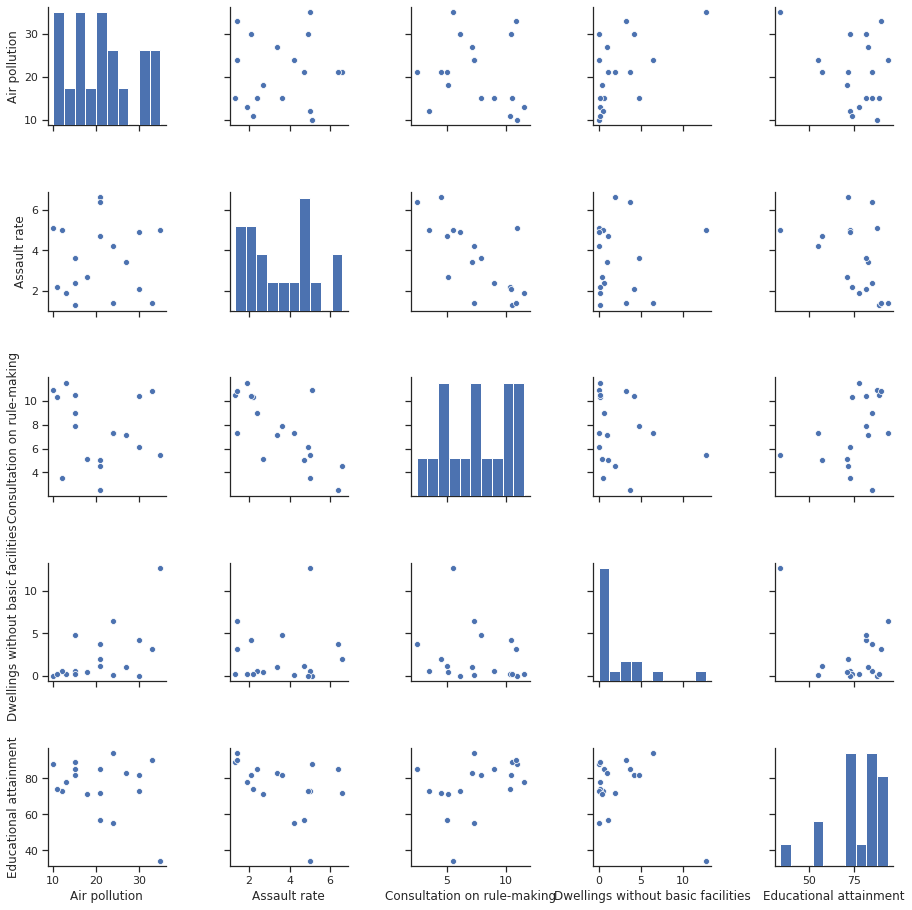

In [33]:
sns.pairplot(df_train[var_names[:5]])

In [34]:
df_train.describe()

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.000000,18.000000,18.000000
mean,20.833333,3.572222,7.511111,2.294444,75.833333,10.348333,66.444444,0.933333,24456.111111,45309.777778,21.222222,6.083333,80.672222,2.987222,37327.888889,89.833333,1.694444,68.222222,503.444444,14.846667,72.50000,83.333333,17.661111,34271.063389
std,7.815896,1.725520,2.810880,3.246803,14.849242,9.812365,8.233520,0.517914,5004.351846,25546.134865,1.864705,3.265731,2.493711,3.050683,10146.055889,5.404247,0.431785,15.791120,22.377042,0.600676,10.54542,10.397964,1.243401,12603.502473
min,10.000000,1.300000,2.500000,0.000000,34.000000,0.450000,50.000000,0.300000,14095.000000,3251.000000,16.000000,2.400000,74.600000,0.010000,16919.000000,72.000000,1.100000,30.000000,462.000000,13.420000,53.00000,62.000000,15.800000,9437.372000
25%,15.000000,2.125000,5.200000,0.200000,72.250000,3.730000,60.500000,0.600000,22197.250000,25653.000000,21.000000,4.625000,80.775000,1.182500,34626.750000,87.500000,1.400000,65.250000,487.750000,14.512500,66.50000,77.250000,16.500000,27863.043000
50%,21.000000,3.500000,7.300000,0.800000,80.000000,7.510000,68.000000,0.900000,25638.500000,49314.000000,21.000000,5.450000,81.400000,2.050000,38207.000000,90.500000,1.750000,70.500000,501.000000,14.880000,75.00000,86.000000,17.550000,37359.948500
75%,26.250000,4.975000,10.375000,3.575000,85.000000,13.577500,72.000000,1.200000,28212.000000,60665.500000,22.000000,6.500000,82.025000,3.852500,44197.250000,93.500000,1.900000,76.750000,520.500000,15.092500,79.25000,91.750000,18.625000,43535.326500
max,35.000000,6.600000,11.500000,12.700000,94.000000,40.860000,82.000000,2.300000,31173.000000,86764.000000,24.000000,17.800000,83.200000,12.960000,55716.000000,96.000000,2.500000,90.000000,542.000000,16.060000,89.00000,97.000000,19.800000,50854.583000


In [0]:
df_train_new = df_train[df_train.columns[df_train.columns != 'Dwellings without basic facilities']]

In [0]:
X_train_new = df_train_new.to_numpy()

In [37]:
reg = LinearRegression()
reg.fit(X_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
df_valid = pd.DataFrame(X_valid, columns=var_names)
df_valid_new = df_valid[df_valid.columns[df_valid.columns != 'Dwellings without basic facilities']]
X_valid_new = df_valid_new.to_numpy()

In [39]:
mean_squared_error(y_valid, reg.predict(X_valid_new))

0.47316285564692667

In [40]:
print(y_valid, reg.predict(X_valid_new))

[6.1 4.8 7.5 7.  6. ] [5.28006672 5.67163713 7.65611678 6.82717597 5.06216643]
